In [25]:
import os
import glob
import time
import RPi.GPIO as GPIO
# some_file.py
import sys
sys.path.insert(0, '/home/pi/DHT11_Python')

import dht11

GPIO.setwarnings(False)
GPIO.setmode(GPIO.BCM)


dht11_sensor = dht11.DHT11(pin=3)


def read_temp_dht11():
    reading = dht11_sensor.read()
    return reading.temperature

def read_hum_dht11():
    reading = dht11_sensor.read()
    return reading.humidity


# 28-031651fb6bff  28-051684c1c6ff
base_dir = '/sys/bus/w1/devices/'
device_folder_t1 = '28-031651fb6bff'
device_folder_t2 = '28-051684c1c6ff'
DS18B20_t1 = base_dir + device_folder_t1 + '/w1_slave'
DS18B20_t2 = base_dir + device_folder_t2 + '/w1_slave'

def read_temp_DS18B20_raw_1():
    f = open(DS18B20_t1, 'r')
    lines = f.readlines()
    f.close()
    return lines

def read_temp_DS18B20_raw_2():
    f = open(DS18B20_t2, 'r')
    lines = f.readlines()
    f.close()
    return lines

def read_temp_DS18B20_1():
    lines = read_temp_DS18B20_raw_1()
    while lines[0].strip()[-3:] != 'YES':
        time.sleep(0.2)
        lines = read_temp_DS18B20_raw_1()
    equals_pos = lines[1].find('t=')
    if equals_pos != -1:
        temp_string = lines[1][equals_pos+2:]
        temp_c = float(temp_string) / 1000.0
        return temp_c

def read_temp_DS18B20_2():
    lines = read_temp_DS18B20_raw_2()
    while lines[0].strip()[-3:] != 'YES':
        time.sleep(0.2)
        lines = read_temp_DS18B20_raw_2()
    equals_pos = lines[1].find('t=')
    if equals_pos != -1:
        temp_string = lines[1][equals_pos+2:]
        temp_c = float(temp_string) / 1000.0
        return temp_c
    
print(read_temp_raw_1())
print(read_temp_DS18B20_1())
print(read_temp_raw_2())
print(read_temp_DS18B20_2())
print(read_hum_dht11())
GPIO.cleanup()

['83 01 4b 46 7f ff 0c 10 a2 : crc=a2 YES\n', '83 01 4b 46 7f ff 0c 10 a2 t=24187\n']
24.187
['87 01 4b 46 7f ff 0c 10 b7 : crc=b7 YES\n', '87 01 4b 46 7f ff 0c 10 b7 t=24437\n']
24.437
30


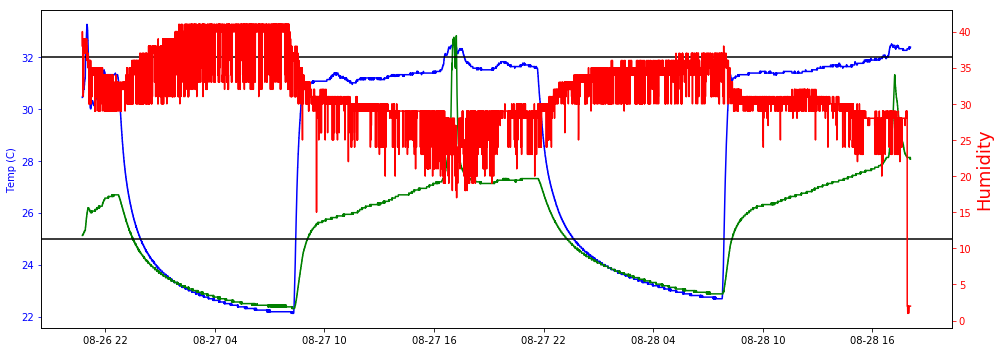

In [ ]:
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import glob
import time
import RPi.GPIO as GPIO
from datetime import datetime
# some_file.py
import sys
sys.path.insert(0, '/home/pi/DHT11_Python')
import dht11

GPIO.setwarnings(False)
GPIO.setmode(GPIO.BCM)


dht11_sensor = dht11.DHT11(pin=3)


def read_temp_dht11():
    reading = dht11_sensor.read()
    return reading.temperature

def read_hum_dht11():
    reading = dht11_sensor.read()
    while reading.humidity == 0:
        reading = dht11_sensor.read()
    return reading.humidity


# 28-031651fb6bff  28-051684c1c6ff
base_dir = '/sys/bus/w1/devices/'
device_folder_t1 = '28-031651fb6bff'
device_folder_t2 = '28-051684c1c6ff'
DS18B20_t1 = base_dir + device_folder_t1 + '/w1_slave'
DS18B20_t2 = base_dir + device_folder_t2 + '/w1_slave'

def read_temp_DS18B20_raw_1():
    f = open(DS18B20_t1, 'r')
    lines = f.readlines()
    f.close()
    return lines

def read_temp_DS18B20_raw_2():
    f = open(DS18B20_t2, 'r')
    lines = f.readlines()
    f.close()
    return lines

def read_temp_DS18B20_1():
    lines = read_temp_DS18B20_raw_1()
    while lines[0].strip()[-3:] != 'YES':
        time.sleep(0.2)
        lines = read_temp_DS18B20_raw_1()
    equals_pos = lines[1].find('t=')
    if equals_pos != -1:
        temp_string = lines[1][equals_pos+2:]
        temp_c = float(temp_string) / 1000.0
        return temp_c

def read_temp_DS18B20_2():
    lines = read_temp_DS18B20_raw_2()
    while lines[0].strip()[-3:] != 'YES':
        time.sleep(0.2)
        lines = read_temp_DS18B20_raw_2()
    equals_pos = lines[1].find('t=')
    if equals_pos != -1:
        temp_string = lines[1][equals_pos+2:]
        temp_c = float(temp_string) / 1000.0
        return temp_c

t1 = []
t2 = []
t3 = []
h1 = []
x = []
first = True
#for i in range(4):
while True:
    clear_output(True)
    fig, ax_t = plt.subplots(figsize=(14,5))
    fig.subplots_adjust(right=0.95)
    x.append(datetime.now())
    t1.append(read_temp_DS18B20_1())
    t2.append(read_temp_DS18B20_2())
    h1.append(read_hum_dht11())
    if not first:
        ax_t.clear()
        ax_h.clear()
        #ax_t2.clear()
    
    ax_t.plot(x,t1,'b-')
    ax_t.plot(x,t2,'g')
    ax_t.set_ylabel('Temp (C)',color='b')
    plt.axhline(y=32,hold=None,color='black')
    plt.axhline(y=25,hold=None,color='black')
    ax_t.tick_params('y',colors='b')
    #ax_t2 = ax_t.twinx()
    #ax_t2.plot(x,t1,'y')
    #ax_t2.set_ylabel('Temp (C)',color='b')
    #ax_t.tick_params('y',colors='b')
    ax_h = ax_t.twinx()
    ax_h.plot(x,h1,'r')
    ax_h.set_ylabel('Humidity',color='r', size=18)
    ax_h.tick_params('y',colors='r')
    fig.tight_layout()
    plt.show()
    time.sleep(2)
    
    first = False

GPIO.cleanup()


In [4]:
t1

[27.437, 27.5, 27.562, 27.625]

In [5]:
t2

[23.375, 23.375, 23.375, 23.375]

In [ ]:
h1

In [1]:
import Adafruit_DHT

In [2]:
hum= Adafruit_DHT.DHT22

In [7]:
humidity, temperature = Adafruit_DHT.read_retry(hum, 3)

In [11]:
def read_d(pin):
    humidity, temperature = Adafruit_DHT.read_retry(hum, pin)
    return humidity, temperature

In [14]:

print(read_d(3)[0])

53.400001525878906


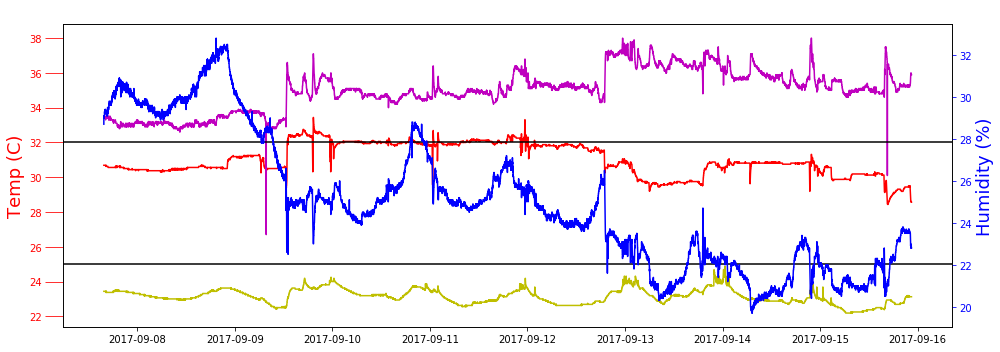

In [ ]:
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import glob
import time
import RPi.GPIO as GPIO
from ISStreamer.Streamer import Streamer
from datetime import datetime
# some_file.py
import sys
sys.path.insert(0, '/home/pi/DHT11_Python')
import Adafruit_DHT
humidity_gpio_pin = 3
humidity_sensor = Adafruit_DHT.DHT22
GPIO.setwarnings(False)
GPIO.setmode(GPIO.BCM)

City = "SnakeTown"
BUCKET_NAME = ":snake:Vivarium"
BUCKET_KEY = "6WF68MMQHWNE"
ACCESS_KEY = "Sp0PqHZLPcANl6wF2EyRCJpaRGZN1QcV"
SENSOR_LOCATION_NAME = "Viv1"

streamer = Streamer(bucket_name = BUCKET_NAME, bucket_key = BUCKET_KEY, access_key = ACCESS_KEY)

def read_dht22(pin):
    humidity, temperature = Adafruit_DHT.read_retry(humidity_sensor, pin)
    return humidity, temperature


# 28-031651fb6bff  28-051684c1c6ff
base_dir = '/sys/bus/w1/devices/'
device_folder_t1 = '28-031651fb6bff'
device_folder_t2 = '28-051684c1c6ff'
DS18B20_t1 = base_dir + device_folder_t1 + '/w1_slave'
DS18B20_t2 = base_dir + device_folder_t2 + '/w1_slave'

def read_temp_DS18B20_raw_1():
    f = open(DS18B20_t1, 'r')
    lines = f.readlines()
    f.close()
    return lines

def read_temp_DS18B20_raw_2():
    f = open(DS18B20_t2, 'r')
    lines = f.readlines()
    f.close()
    return lines

def read_temp_DS18B20_1():
    lines = read_temp_DS18B20_raw_1()
    while lines[0].strip()[-3:] != 'YES':
        time.sleep(0.2)
        lines = read_temp_DS18B20_raw_1()
    equals_pos = lines[1].find('t=')
    if equals_pos != -1:
        temp_string = lines[1][equals_pos+2:]
        temp_c = float(temp_string) / 1000.0
        return temp_c

def read_temp_DS18B20_2():
    lines = read_temp_DS18B20_raw_2()
    while lines[0].strip()[-3:] != 'YES':
        time.sleep(0.2)
        lines = read_temp_DS18B20_raw_2()
    equals_pos = lines[1].find('t=')
    if equals_pos != -1:
        temp_string = lines[1][equals_pos+2:]
        temp_c = float(temp_string) / 1000.0
        return temp_c

t1 = []
t2 = []
t3 = []
h1 = []
x = []
is_time = 0
first = True
hot_end = 0
#for i in range(40):
while True:
    clear_output(True)
    fig, ax_t = plt.subplots(figsize=(14,5))
    fig.subplots_adjust(right=0.95)
    x.append(datetime.now())
    hot_end = read_temp_DS18B20_1()
    cool_end = read_temp_DS18B20_2()
    t1.append(hot_end)
    t2.append(cool_end)
    dht22_h, dht22_t = read_dht22(humidity_gpio_pin)
    h1.append(dht22_h)
    t3.append(dht22_t)
    if is_time > 30:
        try:
            streamer.log(":sunny: " + SENSOR_LOCATION_NAME + " Hot End temp (C)", round(hot_end,2) )
            streamer.log(":sunny: " + SENSOR_LOCATION_NAME + " Roof Temp (C)", round(dht22_t,2) )
            streamer.log(":sunny: " + SENSOR_LOCATION_NAME + " Cool End temp (C)", round(cool_end,1) )
            streamer.log(":sweat_drops: " + SENSOR_LOCATION_NAME + " Humidity (%)", round(dht22_h,1) )
            streamer.flush()
            is_time = 0
        except Exception:
            continue
    if not first:
        ax_t.clear()
        ax_h.clear()
        #ax_t2.clear()
    
    ax_t.plot(x,t1,'r')
    ax_t.plot(x,t2,'y')
    ax_t.plot(x,t3,'m')
    ax_t.set_ylabel('Temp (C)',color='r',size=18)
    plt.axhline(y=32,hold=None,color='black')
    plt.axhline(y=25,hold=None,color='black')
    ax_t.tick_params('y',colors='r',size=18)
    #ax_t2 = ax_t.twinx()
    #ax_t2.plot(x,t1,'y')
    #ax_t2.set_ylabel('Temp (C)',color='b')
    #ax_t.tick_params('y',colors='b')
    ax_h = ax_t.twinx()
    ax_h.plot(x,h1,'b')
    ax_h.set_ylabel('Humidity (%)',color='b', size=18)
    
    ax_h.tick_params('y',colors='b')
    fig.tight_layout()
    plt.show()
    time.sleep(30)
    
    first = False
    is_time+=1

GPIO.cleanup()


In [16]:
h1

[54.099998474121094, 54.0, 54.0, 54.0]

In [1]:
from ISStreamer.Streamer import Streamer

In [8]:
City = "SnakeTown"
BUCKET_NAME = ":snake:Vivarium"
BUCKET_KEY = "6WF68MMQHWNE"
ACCESS_KEY = "Sp0PqHZLPcANl6wF2EyRCJpaRGZN1QcV"
SENSOR_LOCATION_NAME = "Viv1"

streamer = Streamer(bucket_name = BUCKET_NAME, bucket_key = BUCKET_KEY, access_key = ACCESS_KEY)
print('uploading')
streamer.log(":sunny: " + SENSOR_LOCATION_NAME + " Hot End temp (C)", 32 )
streamer.log(":sunny: " + SENSOR_LOCATION_NAME + " Roof Temp (C)", 34 )
streamer.log(":sunny: " + SENSOR_LOCATION_NAME + " Cool End temp (C)", 24 )
streamer.log(":sweat_drops: " + SENSOR_LOCATION_NAME + " Humidity (%)", 30 )
streamer.flush()

uploading


In [10]:
print(round(56.4567,1))

56.5


In [ ]:
print('bob')